#Detecting Hate Speech in Tweets

**Team:** Zuzanna Matysiak, Zachary Cahoone, Amy Zhou 

**Project Mentor TA:** Haoyu Wang

#### For our project, we will be investigating hate speech in tweets. We want to compare different machine learning models and see which one of them performs best in doing so and what features are based to extract to learn based on. We plan to use Natural Language Toolkit to tokenize Twitter data and extract features. The data we will be using will be similar to the data used in the paper that was the impetus for our project. Unfortunately, we do not have access to all 4 datasets that they used, hence we will use the available ones only: data from Davidson, data from Waseem, and we will send an email to Founta to ask for his data. Then, we will use select words that we believe could be indicators for hate speech to use as features. Initially, we will use the same bag of words they used. We will also do an investigation to see if there are other potentially predictive features we can include. We plan to use various machine learning models and compare their performance to the paper which only used logistic regression. We will evaluate our results by comparing to the f-1 score, precision and recall they got in our paper. If we can find models that can predict hate speech better, it is a good sign and we should discuss why that happened. If some models and feature extraction do not perform so well, we should perform case studies, try other features, and possibly discuss what are some reasons it went wrong. 

#### Possible add-ons to our project depending on the progress we have: using Twitter AAE model (similarly to what they did in the second part of the paper) to see if there is racial bias in classification of our models. This model takes in tweets and tells the probability they were written by black vs. white people based on the language used. We are a little skeptical about using this, as it adds more data inferred by models, but it is used in the cited paper. 

# Import libraries and datasets

#### In this section, we imported Davidson dataset and also bag of words of bad words. We tokonized tweets using TweetTokenizer from nltk. We also performed initial preprocessing of the data to add a column for each bad word from the bag.

In [26]:
import pandas as pd
from nltk.tokenize import TweetTokenizer
import csv
import urllib
import regex as re

In [27]:
!pip install sklearn

This is a function that preprocesses the data in the following way: it drops the Unnamed:0 column, get rids of RT and mentiones in the data. 

In [28]:
def preprocessing_method1(url, col_name):
  df = pd.read_csv(url)
  df = df.drop(["Unnamed: 0"], axis = 1)
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x))) # removes retweets
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(@[A-Za-z0-9-_]+)', '', str(x))) # removes mentions
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'[^\w\s]','', str(x))) # remove punctuation
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'^\d+\s|\s\d+\s|\s\d+$', ' ', str(x))) # remove digits
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'\s\s+', ' ', str(x))) # remove unncessary spaces
  return df

In [29]:
# TODO for whoever is doing preprocessing other methods, maybe separting hashtags into another column might help with better results :)

Now we will define a function that will help us with tokenizng the data using TweetTokenizer(). 

In [41]:
def tokenize_method1(df, col_name):
   tweet_tokenizer = TweetTokenizer()
   df[col_name] = df[col_name].map(lambda x: tweet_tokenizer.tokenize(x))
   return df

In [42]:
url_hate_speech_data = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df_davidson = preprocessing_method1(url_hate_speech_data, "tweet")
df_davidson

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,As a woman you shouldnt complain about cleani...
1,3,0,3,0,1,boy dats coldtyga dwn bad for cuffin dat hoe ...
2,3,0,3,0,1,Dawg RT You ever fuck a bitch and she start t...
3,3,0,2,1,1,she look like a tranny
4,6,0,6,0,1,The shit you hear about me might be true or i...
...,...,...,...,...,...,...
24778,3,0,2,1,1,yous a muthafin lie right His TL is trash Now ...
24779,3,0,1,2,2,youve gone and broke the wrong heart baby and ...
24780,3,0,3,0,1,young buck wanna eat dat nigguh like I aint fu...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [43]:
df_davidson = tokenize_method1(df_davidson, "tweet")

In [45]:
words = []
url_hate_words = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/lexicons/refined_ngram_dict.csv"
bag_of_words = pd.read_csv(url_hate_words)
for i, row in bag_of_words.iterrows():
  words.append(row[0])
for word in words:
  df_davidson[word] = df_davidson["tweet"].map(lambda x: 1 if word in x else 0)
labels = ["count", "hate_speech", "offensive_language", "neither","class","tweet"]
print(df_davidson)

       count  hate_speech  ...  you a lame bitch  you fuck wit a
0          3            0  ...                 0               0
1          3            0  ...                 0               0
2          3            0  ...                 0               0
3          3            0  ...                 0               0
4          6            0  ...                 0               0
...      ...          ...  ...               ...             ...
24778      3            0  ...                 0               0
24779      3            0  ...                 0               0
24780      3            0  ...                 0               0
24781      6            0  ...                 0               0
24782      3            0  ...                 0               0

[24783 rows x 184 columns]


Import Waseem dataset.

In [46]:
def custom_tokenize(text):
  if not(isinstance(text, str)):
    text = ''
  return tweet_tokenizer.tokenize(text)

In [47]:
df_waseem = pd.read_csv('/content/df_waseem_preprocessed.csv', sep=' ')
df_waseem = df_waseem.drop(["Unnamed: 0"], axis = 1)
tweet_tokenizer = TweetTokenizer()
df_waseem['text'].dropna(inplace=True)
df_waseem["text"] = df_waseem["text"].map(lambda x: custom_tokenize(x))
df_waseem

,text,class_label
0,"[Drasko, they, didn't, cook, half, a, bird, yo...",racism
1,"[Hopefully, someone, cooks, Drasko, in, the, n...",racism
2,"[of, course, you, were, born, in, serbia, ...,...",racism
3,"[These, girls, are, the, equivalent, of, the, ...",racism
4,"[RT, @YesYoureRacist, :, At, least, you're, on...",racism
...,...,...
2738,"[RT, @Superjutah, :, @MT8_9, £, 34,000, is, £,...",sexism
2739,"[RT, @DufresneFrank, :, “, @gabystama, :, @Duf...",sexism
2740,"[RT, @BoycottBrandy, :, @ActionFlickDoc, this,...",sexism
2741,"[RT, @Lyall, :, Patriarchy, ™, will, expel, me...",sexism


In [48]:
for word in words:
  df_waseem[word] = df_waseem["text"].map(lambda x: 1 if word in x else 0)

# Decision Tree Classifier

#### In this section we trained Decision Tree Classifier on the preprocessed Davidson data. We ysed max_depth to be 10 and min_samples_leaf to be 5. 

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

def decision_tree_classifier(dataset):
  X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels, axis = 1), dataset["class"], test_size = 0.3)
  clf = DecisionTreeClassifier(random_state = 100, max_depth = 10, min_samples_leaf = 5)
  clf.fit(X_train, y_train)
  decision_tree_preds = clf.predict(X_test)
  y_test_decision = y_test
  return precision_recall_fscore_support(y_test, decision_tree_preds)

In [57]:
decision_tree_metrics_davidson = decision_tree_classifier(df_davidson)
decision_tree_metrics_davidson

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.56896552, 0.77253626, 0.        ]),
 array([0.07656613, 0.99563242, 0.        ]),
 array([0.13496933, 0.87000992, 0.        ]),
 array([ 431, 5724, 1280]))

In [ ]:
# decision_tree_metrics_waseem = decision_tree_classifier(df_waseem)
# decision_tree_metrics_waseem

# Adabooost Classifier

#### Here, we trained yet another classifier– Adaboost. 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support
def adaboost_classifier(df):
  X_train, X_test, y_train, y_test = train_test_split(df.drop(labels, axis = 1), df["class"], test_size = 0.3)
  clf = AdaBoostClassifier()
  clf.fit(X_train, y_train)
  adaboost_preds = clf.predict(X_test)
  y_test_adaboost = y_test
  return precision_recall_fscore_support(y_test, adaboost_preds)

In [60]:
adaboost_metrics_davidson = adaboost_classifier(df_davidson)
adaboost_metrics_davidson

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.61111111, 0.77712889, 0.        ]),
 array([0.10401891, 0.99530353, 0.        ]),
 array([0.17777778, 0.87278829, 0.        ]),
 array([ 423, 5749, 1263]))

In [ ]:
# adaboost_metrics_waseem = adaboost_classifier(df_waseem)
# adaboost_metrics_waseem

# Logistic Regression

#### Third model we used is the same model as they used in the study— logisitic regression. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

def logisitic_regression_classifier(df):
  X_train, X_test, y_train, y_test = train_test_split(df.drop(labels, axis = 1), df["class"], test_size = 0.3)

  clf = LogisticRegression()
  clf.fit(X_train, y_train)

  logistic_preds = clf.predict(X_test)
  y_test_logisitic = y_test
  return precision_recall_fscore_support(y_test, logistic_preds)

In [ ]:
log_reg_metrics_davidson = logisitic_regression_classifier(df_davidson)
log_reg_metrics_davidson

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.52777778, 0.77591566, 0.        ]),
 array([0.04645477, 0.99704759, 0.        ]),
 array([0.08539326, 0.87269134, 0.        ]),
 array([ 409, 5758, 1268]))

In [ ]:
# log_reg_metrics_waseem = logisitic_regression_classifier(df_waseem)
# log_reg_metrics_waseem

# Confusion Matrices & Heatmaps

#### confusion_matrix_func takes in y_true, y_predicted, label names and model name and displays confusion matrix for given predictions. We ran that function on all of the predictions made in order to visualize how our predictions are doing for different models in comparison to each other. 

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confusion_matrix_func(y_true, y_predicted, labels, model_name_title, figsize = (10,10)):
    cm = confusion_matrix(y_true, y_predicted)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot = cm)
    plt.title(model_name_title)
    plt.show()

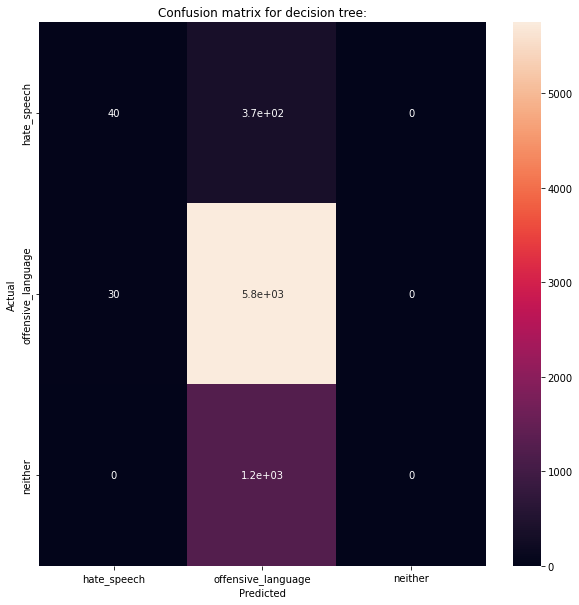

In [ ]:
labels_for_cm = ["hate_speech", "offensive_language", "neither"]
confusion_matrix_func(y_test_decision, decision_tree_preds, labels_for_cm, "Confusion matrix for decision tree:")

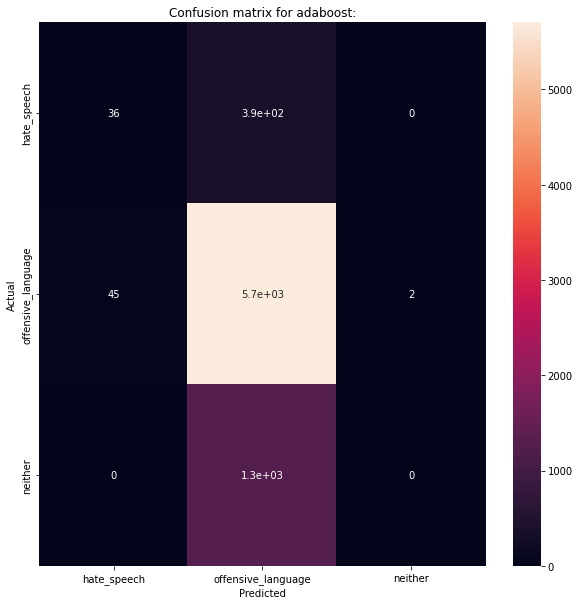

In [ ]:
confusion_matrix_func(y_test_adaboost, adaboost_preds, labels_for_cm, "Confusion matrix for adaboost:")

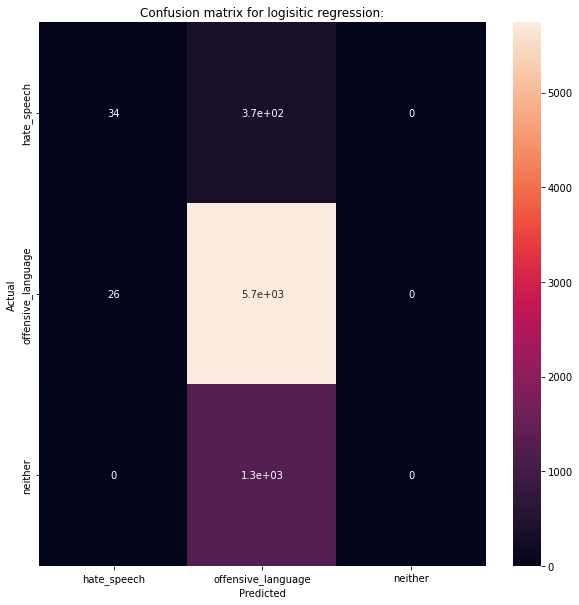

In [ ]:
confusion_matrix_func(y_test_logisitic, logistic_preds, labels_for_cm, "Confusion matrix for logisitic regression:")

# Frequency Distribution of Bad Words

#### In this part, we extract all bad words from the tweets in order to see their frequency distribution.

In [ ]:
# Get bad words from the tweets to see their frequency distribution 
count_of_words = df.tweet.sum()
count_of_words = [x for x in count_of_words if x in words]
print(count_of_words[:30])

['faggots', 'faggot', 'faggot', 'faggot', 'niggers', 'nigger', 'niggers', 'faggot', 'fags', 'faggot', 'faggot', 'nigger', 'faggot', 'niggers', 'faggot', 'nigger', 'faggot', 'dykes', 'nigger', 'faggot', 'niggers', 'faggots', 'fags', 'faggot', 'niggers', 'spic', 'spic', 'spic', 'spic', 'niggers']


#### Next, we plot a histogram for the frequency distribution of the bad words in tweets.

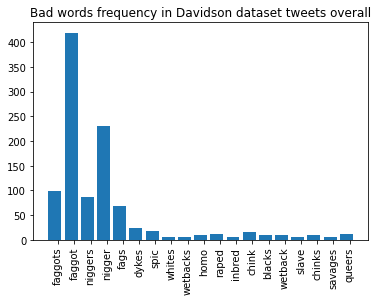

In [ ]:
from collections import Counter
import numpy as np
counts = Counter(count_of_words)
labels, values = zip(*counts.items())
indices = np.arange(len(labels))
bar_width = 0.2
plt.bar(indices, values)
plt.xticks(indices + bar_width, labels, rotation="vertical")
plt.title("Bad words frequency in Davidson dataset tweets overall")
plt.show()

# Word Cloud Analysis

#### Lastly, in order to better understand which words appear most frequently we used word 

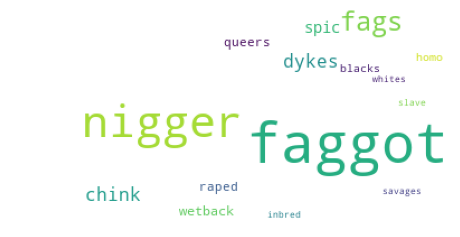

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, background_color="white", collocations=False).generate(' '.join(count_of_words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()